In [1]:
import pandas as pd
import numpy as np
import os
import io 
import requests
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import svds
import seaborn as sns
import random
import implicit
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import preprocessing
%matplotlib inline
from graphlab import SFrame
from graphlab import model_parameter_search, SFrame
import graphlab as gl
import graphlab.aggregate as agg

import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import AlgoBase
from surprise import Dataset
from surprise import Reader
from surprise import evaluate
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import PredictionImpossible
from surprise import dump
from surprise.accuracy import rmse

# Load Data

In [2]:
df=pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
len(df)

541909

# Explore Data

In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df['InvoiceDate'].describe()

count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

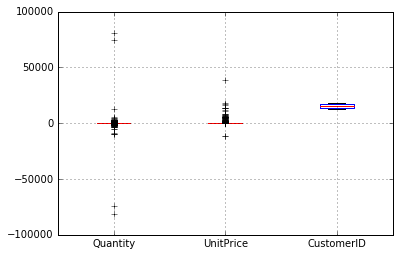

In [7]:
df.boxplot()

In [8]:
df = df[df['UnitPrice'] > 0.00]
df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.nlargest(10,'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom


In [10]:
df.nsmallest(10,'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
224419,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,16938.0,United Kingdom
187609,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133.0,United Kingdom
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom


In [11]:
df=df[~df['Quantity'].isin([74215,80995])]
df.describe()

,Quantity,UnitPrice,CustomerID
count,539390.000000,539390.000000,406787.000000
mean,9.558190,4.673659,15287.800215
std,155.031604,94.614898,1713.570107
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,4800.000000,38970.000000,18287.000000


In [12]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530102.000000,530102.000000,397882.000000
mean,10.249284,3.907634,15294.427969
std,37.793548,35.915749,1713.138517
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,4800.000000,13541.330000,18287.000000


In [13]:
df = df.loc[pd.isnull(df.CustomerID) == False]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397882.000000,397882.000000,397882.000000
mean,12.598213,3.116496,15294.427969
std,42.886003,22.097932,1713.138517
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,4800.000000,8142.750000,18287.000000


In [14]:
df['Sales']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df['Sales'].sum()

8665754.704003213

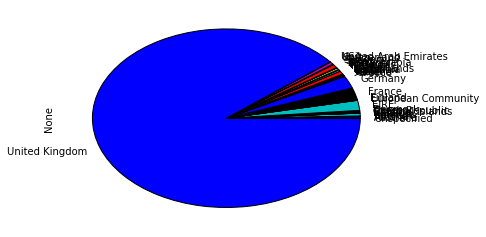

In [16]:
country_group = df.groupby('Country')
country_group.size().plot.pie()

In [17]:
df[['Quantity', 'StockCode']].groupby('Quantity').count().describe()

,StockCode
count,299.000000
mean,1330.709030
std,7406.005133
min,1.000000
25%,1.000000
50%,3.000000
75%,17.000000
max,73301.000000


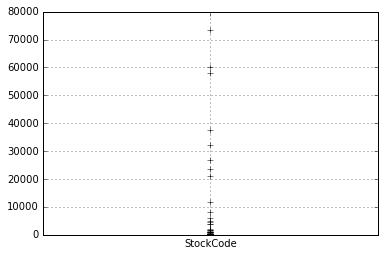

In [18]:
df[['Quantity', 'StockCode']].groupby('Quantity').count().boxplot()

In [19]:
quantbydate=df[['Quantity','InvoiceDate']].groupby('Quantity')
quantbydate.head()

,Quantity,InvoiceDate
0,6,2010-12-01 08:26:00
1,6,2010-12-01 08:26:00
2,8,2010-12-01 08:26:00
3,6,2010-12-01 08:26:00
4,6,2010-12-01 08:26:00
5,2,2010-12-01 08:26:00
6,6,2010-12-01 08:26:00
9,32,2010-12-01 08:34:00
12,8,2010-12-01 08:34:00
15,3,2010-12-01 08:34:00


In [20]:
minquantbd= quantbydate.min()
maxquantbd= quantbydate.max()
duration = maxquantbd - minquantbd
duration.head()

,InvoiceDate
Quantity,
1,373 days 02:39:00
2,373 days 03:54:00
3,373 days 04:16:00
4,373 days 04:16:00
5,373 days 01:10:00


In [21]:
df["dayOfWeek"] = df['InvoiceDate'].dt.dayofweek 
df["hourOfDay"] = df['InvoiceDate'].dt.hour 
df["weekOfYear"] = df['InvoiceDate'].dt.weekofyear 
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,8,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,8,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,8,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,8,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,8,48
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2,8,48
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2,8,48
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2,8,48
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2,8,48
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2,8,48


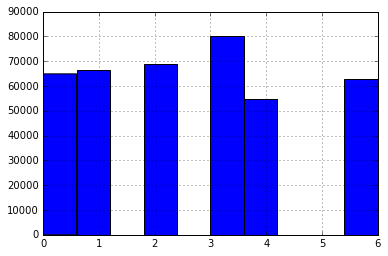

In [22]:
df['dayOfWeek'].hist()

In [23]:
df['dayOfWeek'].value_counts() #We can see the days of activity
# We also see that there is only 6 days of operation insteady of 7

3    80035
2    68885
1    66472
0    64893
6    62773
4    54824
Name: dayOfWeek, dtype: int64

In [24]:
purch_by_day = df['dayOfWeek'].groupby(df['dayOfWeek']).count().to_frame("df")
purch_by_day.index=["Day 1","Day 2","Day 3","Day 4","Day 5","Day 6"]
purch_by_day.head(10)

,df
Day 1,64893
Day 2,66472
Day 3,68885
Day 4,80035
Day 5,54824
Day 6,62773


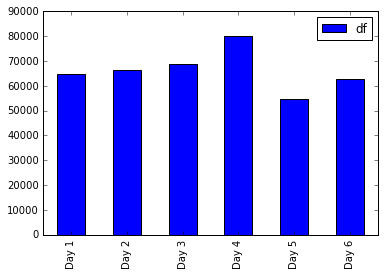

In [25]:
purch_by_day.plot(kind='bar')

In [26]:
duration.describe()

,InvoiceDate
count,299
mean,165 days 12:58:49.966555
std,161 days 11:25:11.772782
min,0 days 00:00:00
25%,0 days 00:00:00
50%,126 days 23:56:00
75%,355 days 19:53:00
max,373 days 04:24:00


In [27]:
df['CustomerID']=df['CustomerID'].astype(object)

In [28]:
customeract=df[['CustomerID','StockCode','Quantity']].groupby(['CustomerID','StockCode','Quantity'])
customeract.head()

,CustomerID,StockCode,Quantity
0,17850,85123A,6
1,17850,71053,6
2,17850,84406B,8
3,17850,84029G,6
4,17850,84029E,6
5,17850,22752,2
6,17850,21730,6
7,17850,22633,6
8,17850,22632,6
9,13047,84879,32


In [61]:
sales_totals = country_group.sum()
sales_totals

,Quantity,UnitPrice,Sales,dayOfWeek,hourOfDay,weekOfYear
Country,,,,,,
Australia,83901,3.612500e+03,1.385213e+05,2779,13471,28525
Austria,4881,1.693900e+03,1.019868e+04,708,4844,12470
Bahrain,260,7.895000e+01,5.484000e+02,12,237,327
Belgium,23237,7.372850e+03,4.119634e+04,5425,24831,61126
Brazil,356,1.426000e+02,1.143600e+03,128,320,480
Canada,2763,9.105800e+02,3.666380e+03,21,1490,3907
Channel Islands,9491,3.389650e+03,2.045044e+04,1823,8224,20343
Cyprus,6361,3.506180e+03,1.359038e+04,1420,7383,18037
Czech Republic,671,7.827000e+01,8.267400e+02,40,220,535


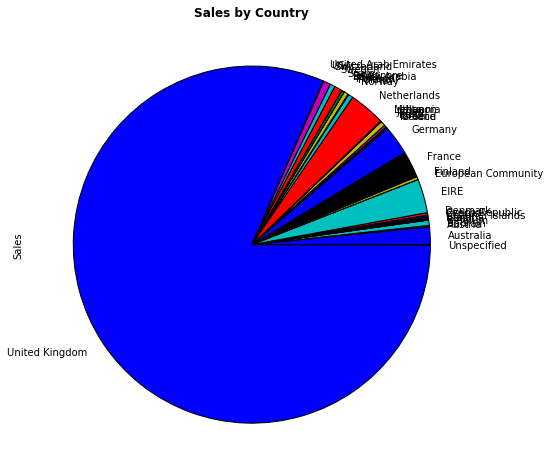

In [31]:
sales_totals['Sales'].plot(x="Country", subplots=True, kind="pie", figsize=(8,8))
plt.title('Sales by Country', weight='bold', size=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003427F0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000347F47B8>]], dtype=object)

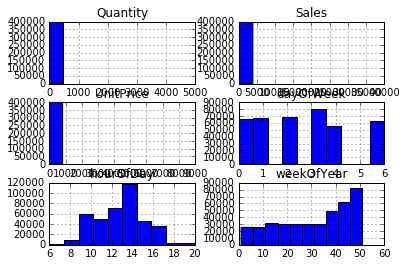

In [32]:
df.hist()

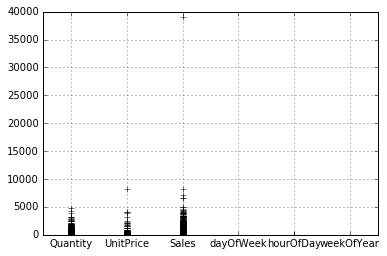

In [33]:
df.boxplot()

In [34]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Sales                 float64
dayOfWeek               int64
hourOfDay               int64
weekOfYear              int64
dtype: object

In [35]:
df.count()

InvoiceNo      397882
StockCode      397882
Description    397882
Quantity       397882
InvoiceDate    397882
UnitPrice      397882
CustomerID     397882
Country        397882
Sales          397882
dayOfWeek      397882
hourOfDay      397882
weekOfYear     397882
dtype: int64

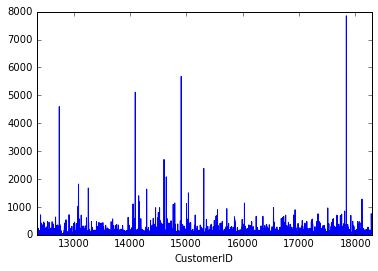

In [36]:
df['InvoiceNo'].groupby(df['CustomerID']).size().plot()

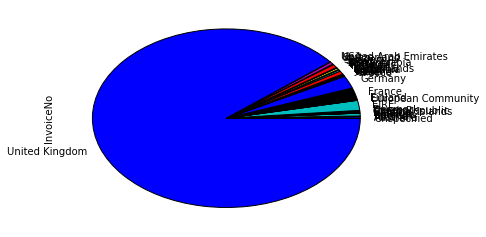

In [37]:
df.InvoiceNo.groupby(df['Country']).size().plot.pie()

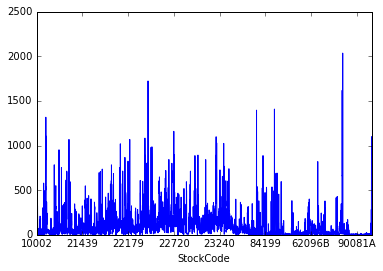

In [38]:
df.InvoiceNo.groupby(df['StockCode']).size().plot()

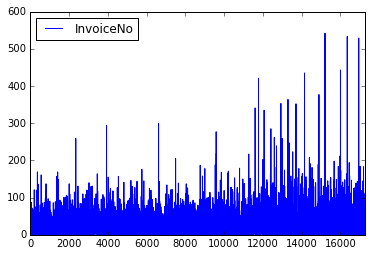

In [39]:
 df['InvoiceNo'].groupby(df['InvoiceDate']).size().reset_index().plot()

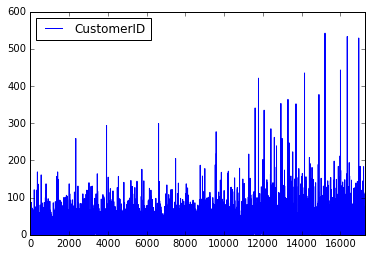

In [40]:
 df['CustomerID'].groupby(df['InvoiceDate']).size().reset_index().plot()

In [41]:
item_lookup = df[['StockCode', 'Description']].drop_duplicates() 
# Only get unique item/description pairs

In [42]:
item_lookup['StockCode'] = item_lookup.StockCode.astype(str) 
# Encode as strings for future lookup ease

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48


In [44]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Sales                 float64
dayOfWeek               int64
hourOfDay               int64
weekOfYear              int64
dtype: object

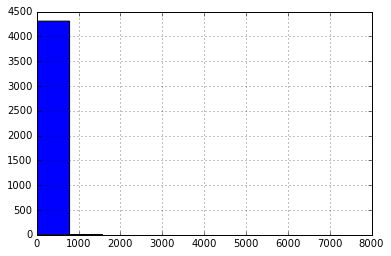

In [45]:
df['CustomerID'].value_counts().hist()

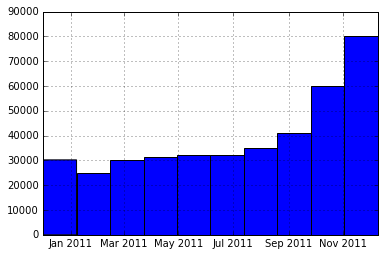

In [46]:
df['InvoiceDate'].hist()

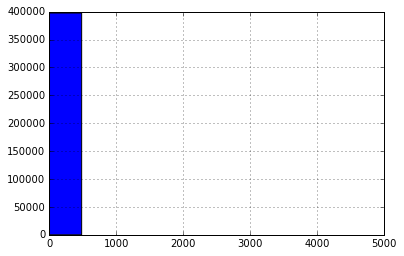

In [47]:
df['Quantity'].hist()

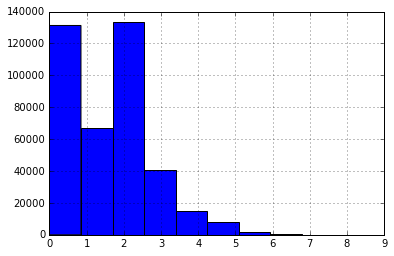

In [48]:
df['Quantity'].apply(np.log).hist()

In [49]:
df['logquant']=df['Quantity'].apply(np.log)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear,logquant
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8,48,1.791759
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.791759
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8,48,2.079442
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.791759
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.791759
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2,8,48,0.693147
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2,8,48,1.791759
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2,8,48,1.791759
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2,8,48,1.791759
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2,8,48,3.465736


In [50]:
df['logquant'].describe()

count    397882.000000
mean          1.647911
std           1.209097
min           0.000000
25%           0.693147
50%           1.791759
75%           2.484907
max           8.476371
Name: logquant, dtype: float64

In [51]:
df['Items']= df['StockCode'].astype(str)+' : '+df['Description'].astype(str)
df.drop(["StockCode", "Description", "Country"], axis=1, inplace=True)
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales,dayOfWeek,hourOfDay,weekOfYear,logquant,Items
0,536365,6,2010-12-01 08:26:00,2.55,17850,15.30,2,8,48,1.791759,85123A : WHITE HANGING HEART T-LIGHT HOLDER
1,536365,6,2010-12-01 08:26:00,3.39,17850,20.34,2,8,48,1.791759,71053 : WHITE METAL LANTERN
2,536365,8,2010-12-01 08:26:00,2.75,17850,22.00,2,8,48,2.079442,84406B : CREAM CUPID HEARTS COAT HANGER
3,536365,6,2010-12-01 08:26:00,3.39,17850,20.34,2,8,48,1.791759,84029G : KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,6,2010-12-01 08:26:00,3.39,17850,20.34,2,8,48,1.791759,84029E : RED WOOLLY HOTTIE WHITE HEART.


In [52]:
df['CustomerID'] = df.CustomerID.astype(int) 
# Convert to int for customer ID

df = df[['CustomerID','Items','logquant']]
# Get rid of unnecessary info

df.head(5)

,CustomerID,Items,logquant
0,17850,85123A : WHITE HANGING HEART T-LIGHT HOLDER,1.791759
1,17850,71053 : WHITE METAL LANTERN,1.791759
2,17850,84406B : CREAM CUPID HEARTS COAT HANGER,2.079442
3,17850,84029G : KNITTED UNION FLAG HOT WATER BOTTLE,1.791759
4,17850,84029E : RED WOOLLY HOTTIE WHITE HEART.,1.791759


In [53]:
df['CustomerID']=df['CustomerID'].apply(lambda x:str(x))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
df['Items']=df['Items'].apply(lambda x:str(x))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
ratings_list = df[['logquant']]
users_list = df[['CustomerID']]
items_list = df[['Items']]

In [56]:
ratings= np.array(ratings_list)
users=np.array(users_list)
items=np.array(items_list)

In [57]:
ratings_df = pd.DataFrame(ratings_list, columns = ['logquant'])
items_df = pd.DataFrame(items_list, columns = [['Items']])
users_df = pd.DataFrame(users_list, columns = [['CustomerID']])

In [58]:
users_list.head()

,CustomerID
0,17850
1,17850
2,17850
3,17850
4,17850


In [59]:
items_df.head()

,Items
0,85123A : WHITE HANGING HEART T-LIGHT HOLDER
1,71053 : WHITE METAL LANTERN
2,84406B : CREAM CUPID HEARTS COAT HANGER
3,84029G : KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E : RED WOOLLY HOTTIE WHITE HEART.


In [66]:
num_customers = df.CustomerID.nunique() # Get our unique customers
num_items = df.Items.nunique() # Get our unique products that were purchased
quantity = df.logquant # All of our purchases

print('Customers: {} Items: {}'.format(num_customers, num_items))

Customers: 4337 Items: 3896


In [67]:
R_df= df.pivot_table(index='CustomerID', columns='Items', values='logquant')
R_df.fillna(0,inplace=True)

In [68]:
R_df.head()

Items,10002 : INFLATABLE POLITICAL GLOBE,10080 : GROOVY CACTUS INFLATABLE,10120 : DOGGY RUBBER,10123C : HEARTS WRAPPING TAPE,10124A : SPOTS ON RED BOOKCOVER TAPE,10124G : ARMY CAMO BOOKCOVER TAPE,10125 : MINI FUNKY DESIGN TAPES,10133 : COLOURING PENCILS BROWN TUBE,10135 : COLOURING PENCILS BROWN TUBE,11001 : ASSTD DESIGN RACING CAR PEN,...,"90214V : LETTER ""V"" BLING KEY RING","90214W : LETTER ""W"" BLING KEY RING","90214Y : LETTER ""Y"" BLING KEY RING","90214Z : LETTER ""Z"" BLING KEY RING",BANK CHARGES : Bank Charges,C2 : CARRIAGE,DOT : DOTCOM POSTAGE,M : Manual,PADS : PADS TO MATCH ALL CUSHIONS,POST : POSTAGE
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447940
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277259


In [69]:
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [70]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

In [71]:
sigma = np.diag(sigma)

In [72]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [73]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
preds_df.head()

Items,10002 : INFLATABLE POLITICAL GLOBE,10080 : GROOVY CACTUS INFLATABLE,10120 : DOGGY RUBBER,10123C : HEARTS WRAPPING TAPE,10124A : SPOTS ON RED BOOKCOVER TAPE,10124G : ARMY CAMO BOOKCOVER TAPE,10125 : MINI FUNKY DESIGN TAPES,10133 : COLOURING PENCILS BROWN TUBE,10135 : COLOURING PENCILS BROWN TUBE,11001 : ASSTD DESIGN RACING CAR PEN,...,"90214V : LETTER ""V"" BLING KEY RING","90214W : LETTER ""W"" BLING KEY RING","90214Y : LETTER ""Y"" BLING KEY RING","90214Z : LETTER ""Z"" BLING KEY RING",BANK CHARGES : Bank Charges,C2 : CARRIAGE,DOT : DOTCOM POSTAGE,M : Manual,PADS : PADS TO MATCH ALL CUSHIONS,POST : POSTAGE
0,0.124019,0.071208,0.010385,0.009678,0.016769,0.017847,-0.059317,0.185329,0.095370,0.176168,...,0.012079,0.012079,0.012815,0.012079,0.010294,0.010643,0.010294,0.065683,0.010294,0.135458
1,-0.025407,0.067406,-0.009315,-0.007238,-0.008881,-0.007670,0.106085,0.043039,-0.064434,0.063740,...,-0.008107,-0.008107,-0.008558,-0.008107,-0.009402,-0.010053,-0.009402,-0.002619,-0.009402,-0.015221
2,0.045189,-0.007659,0.002225,-0.006525,-0.011361,-0.012511,0.005942,0.027264,0.098604,0.019777,...,-0.001371,-0.001371,-0.001375,-0.001371,-0.006007,-0.006996,-0.006007,-0.062462,-0.006007,0.406125
3,0.036642,-0.009652,0.007061,0.004019,0.001936,0.001012,-0.009989,-0.009265,0.037422,0.036059,...,0.003887,0.003887,0.003642,0.003887,0.004259,0.004081,0.004259,0.008085,0.004259,0.110609
4,0.002222,0.013692,0.005290,0.002339,0.006464,0.002367,-0.046107,-0.034511,-0.040272,0.042478,...,0.007471,0.007471,0.007247,0.007471,0.003447,0.003202,0.003447,0.005263,0.003447,0.172391


In [74]:
df=pd.DataFrame([[users_df, items_df, preds_df]])

In [ ]:
def recommend_movies(predictions_df, users_df, items_df, ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = users_df - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
    print 'Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['MovieID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'MovieID',
               right_on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [77]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 9))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['users_df', 'items_df', 'preds_df']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=3)

KeyError: "['users_df' 'items_df' 'preds_df'] not in index"

In [ ]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
#SlopeOne Algorithm
algo = SlopeOne()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

testset = trainset.build_testset()
predictions = algo.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

In [ ]:
algo1 = SVD()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo1, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo1.fit(trainset)

testset = trainset.build_testset()
predictions = algo1.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

In [ ]:
algo2 = KNNBasic()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo2, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset2 = data.build_full_trainset()
algo2.fit(trainset)

testset = trainset.build_testset()
predictions = algo2.test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

In [ ]:
algo3 = NMF()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo3, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo3.fit(trainset)

testset = trainset.build_testset()
predictions = algo3.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

In [ ]:
algo4 = SVDpp()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo4, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo4.fit(trainset)

testset = trainset.build_testset()
predictions = algo4.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

In [ ]:
# The algorithms to cross-validate
classes = (SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
           CoClustering, BaselineOnly, NormalPredictor)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = 'http://surprise.readthedocs.io/en/stable/'
LINK = {'SVD': '[{}]({})'.format('SVD',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD'),
        'SVDpp': '[{}]({})'.format('SVD++',
                                   stable +
                                   'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp'),
        'NMF': '[{}]({})'.format('NMF',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF'),
        'SlopeOne': '[{}]({})'.format('Slope One',
                                      stable +
                                      'slope_one.html#surprise.prediction_algorithms.slope_one.SlopeOne'),
        'KNNBasic': '[{}]({})'.format('k-NN',
                                      stable +
                                      'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic'),
        'KNNWithMeans': '[{}]({})'.format('Centered k-NN',
                                          stable +
                                          'knn_inspired.html#surprise.prediction_algorithms.knns.KNNWithMeans'),
        'KNNBaseline': '[{}]({})'.format('k-NN Baseline',
                                         stable +
                                         'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline'),
        'CoClustering': '[{}]({})'.format('Co-Clustering',
                                          stable +
                                          'co_clustering.html#surprise.prediction_algorithms.co_clustering.CoClustering'),
        'BaselineOnly': '[{}]({})'.format('Baseline',
                                          stable +
                                          'basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly'),
        'NormalPredictor': '[{}]({})'.format('Random',
                                             stable +
                                             'basic_algorithms.html#surprise.prediction_algorithms.random_pred.NormalPredictor'),
        'Online Retail': '[{}]({})'.format('data',
                                   'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'),
        }

In [ ]:
# set RNG
np.random.seed(0)
random.seed(0)

kf = KFold(random_state=0)  # folds will be the same for all algorithms.

table = []
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = [LINK[dataset],
          'RMSE',
          'MAE',
          'Time'
          ]
print(tabulate(table, header, tablefmt="pipe"))